KIỂM TRA TỔNG THỂ FILE

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 5)

DATA_PATH = "../data/cleaned/Final.csv"
df = pd.read_csv(DATA_PATH)

df.head()


,Price_Billion,Price_Per_m2,Area_m2,District,Ward,Bedrooms,Is_MatTien,Width_m,Floors,Is Hem,Post Time,Toilets,Segment
0,3.99,88.67,45.0,Quận 4,8,3.0,1,4.5,1.0,0,4/1/2026,3.0,Bình dân
1,1.80,50.00,36.0,Quận 4,4,3.0,1,4.0,1.0,0,31/12/2025,3.0,Bình dân
2,3.15,70.00,45.0,Quận 4,15,3.0,1,4.0,3.5,0,30/12/2025,3.0,Bình dân
3,22.00,79.42,277.0,Quận 4,16,6.0,0,9.0,7.0,1,30/12/2025,6.0,Bình dân
4,3.80,171.17,22.2,Quận 4,13,1.0,0,3.0,2.0,1,30/12/2025,1.0,Cao cấp


Nhận xét

    Dataset đã được gộp từ nhiều nguồn và load thành công.
    Dữ liệu ở dạng bảng, mỗi dòng là một bất động sản.

In [5]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

df.info()


Rows: 19111
Columns: 13
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19111 entries, 0 to 19110
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price_Billion  19111 non-null  float64
 1   Price_Per_m2   19111 non-null  float64
 2   Area_m2        19111 non-null  float64
 3   District       19111 non-null  object 
 4   Ward           19111 non-null  object 
 5   Bedrooms       19111 non-null  float64
 6   Is_MatTien     19111 non-null  int64  
 7   Width_m        19110 non-null  float64
 8   Floors         19111 non-null  float64
 9   Is Hem         19111 non-null  int64  
 10  Post Time      19111 non-null  object 
 11  Toilets        19111 non-null  float64
 12  Segment        19111 non-null  object 
dtypes: float64(7), int64(2), object(4)
memory usage: 1.9+ MB


Nhận xét

    Dataset gồm 19,105 dòng và 12 cột.
    Bao gồm cả biến số (giá, diện tích) và biến phân loại (quận, mặt tiền, hẻm).
    Phù hợp cho bài toán phân tích và phân loại giá nhà đất.

    Price_Billion   : Giá nhà (tỷ VNĐ)
    Price_Per_m2    : Giá trên mỗi mét vuông
    Area_m2         : Diện tích nhà
    District        : Quận
    Ward            : Phường
    Bedrooms        : Số phòng ngủ
    Toilets         : Số toilet
    Floors          : Số tầng
    Width_m         : Chiều ngang nhà
    Is_MatTien      : 1 = nhà mặt tiền, 0 = không
    Is_Hem          : 1 = nhà trong hẻm, 0 = không
    Post Time       : Thời gian đăng bài

KIỂM TRA MISSING VALUES

In [6]:
missing = df.isna().sum()
missing_percent = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    "Missing_Count": missing,
    "Percent (%)": missing_percent.round(2)
}).sort_values("Missing_Count", ascending=False)

missing_df


,Missing_Count,Percent (%)
Width_m,1,0.01
Price_Per_m2,0,0.00
Area_m2,0,0.00
District,0,0.00
Price_Billion,0,0.00
Ward,0,0.00
Bedrooms,0,0.00
Is_MatTien,0,0.00
Floors,0,0.00
Is Hem,0,0.00


Visualize

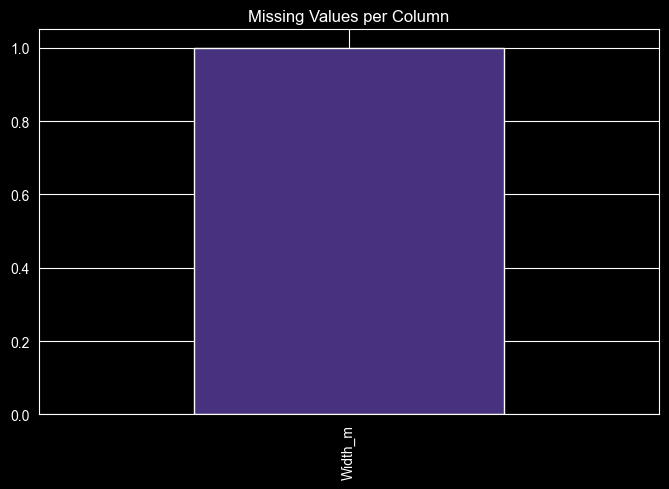

In [7]:
missing_df[missing_df["Missing_Count"] > 0]["Missing_Count"].plot(
    kind="bar", title="Missing Values per Column"
)
plt.show()


KIỂM TRA DỮ LIỆU TRÙNG LẶP

In [8]:
dup_count = df.duplicated().sum()
dup_count


np.int64(176)

In [9]:
df = df.drop_duplicates()
print("Rows after removing duplicates:", len(df))


Rows after removing duplicates: 18935


Nhận xét

        Số bản ghi trùng lặp rất ít.
        Việc loại bỏ giúp tránh gây lệch phân tích.

THỐNG KÊ MÔ TẢ (DESCRIPTIVE STATISTICS)

In [10]:
numeric_cols = [
    "Price_Billion", "Price_Per_m2", "Area_m2",
    "Bedrooms", "Toilets", "Floors", "Width_m"
]

df[numeric_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
Price_Billion,18935.0,12.510167,21.972842,0.009999,5.0,7.1,12.30,636.00
Price_Per_m2,18935.0,132.627724,96.127839,10.000000,77.5,108.9,156.25,1020.41
Area_m2,18935.0,95.105632,97.773879,10.000000,50.0,69.0,100.00,1000.00
Bedrooms,18935.0,3.910694,2.248058,1.000000,3.0,4.0,4.00,20.00
Toilets,18935.0,3.726644,2.292528,1.000000,2.0,3.0,4.00,20.00
Floors,18935.0,2.920174,1.466882,1.000000,2.0,3.0,4.00,10.00
Width_m,18934.0,5.702047,4.154366,1.500000,4.0,4.4,6.00,49.00


Nhận xét

    Giá và diện tích có độ phân tán lớn.
    Mean lớn hơn median cho thấy phân phối bị lệch phải.
    Phản ánh đúng thị trường nhà đất có một số tài sản giá rất cao.

PHÂN PHỐI GIÁ & DIỆN TÍCH

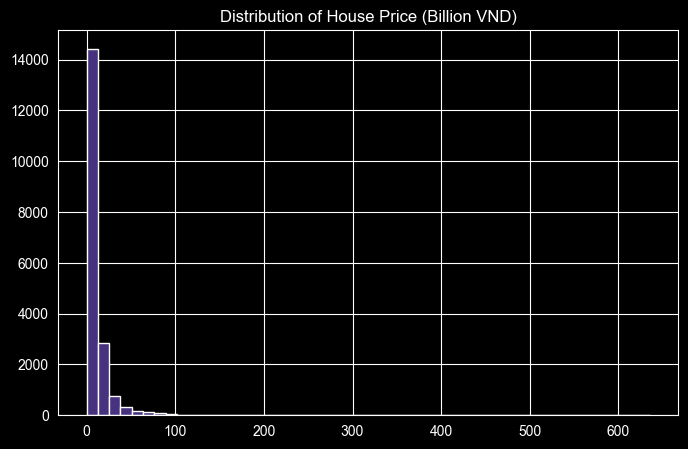

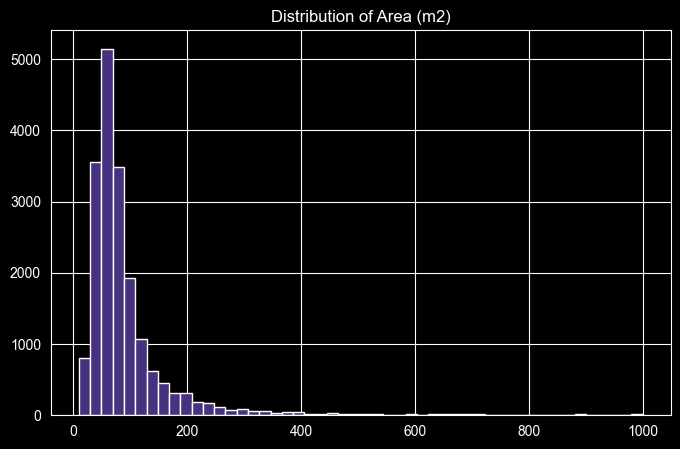

In [11]:
df["Price_Billion"].hist(bins=50)
plt.title("Distribution of House Price (Billion VND)")
plt.show()

df["Area_m2"].hist(bins=50)
plt.title("Distribution of Area (m2)")
plt.show()


Nhận xét

    Phần lớn nhà có giá và diện tích ở mức trung bình.
    Một số ít nhà có giá trị rất cao kéo lệch phân phối.

PHÁT HIỆN OUTLIER (BOXPLOT)

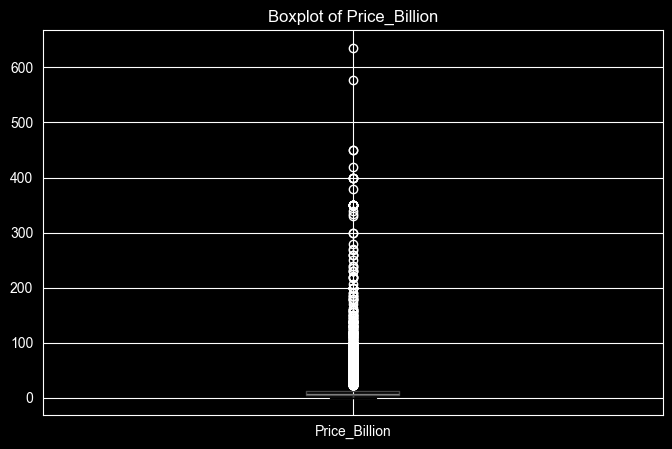

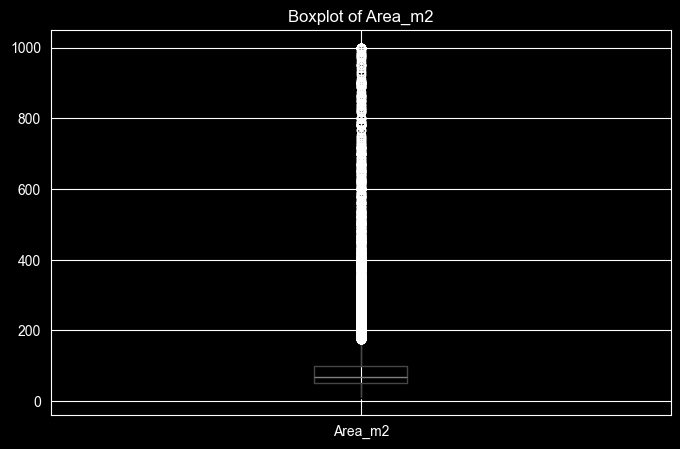

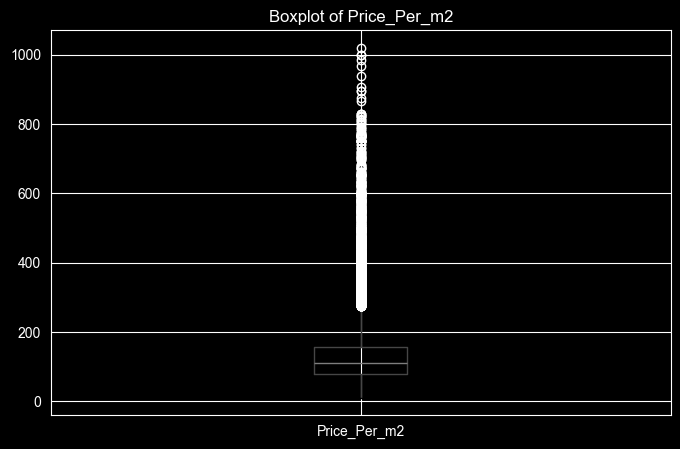

In [12]:
for col in ["Price_Billion", "Area_m2", "Price_Per_m2"]:
    df.boxplot(column=col)
    plt.title(f"Boxplot of {col}")
    plt.show()


Nhận xét

    Dữ liệu tồn tại outlier rõ rệt.

    Đây không phải lỗi dữ liệu mà phản ánh nhà cao cấp, biệt thự, vị trí trung tâm.

Không loại bỏ ngay, sẽ cân nhắc khi xây dựng mô hình.

BIẾN PHÂN LOẠI (CATEGORICAL)

Quận

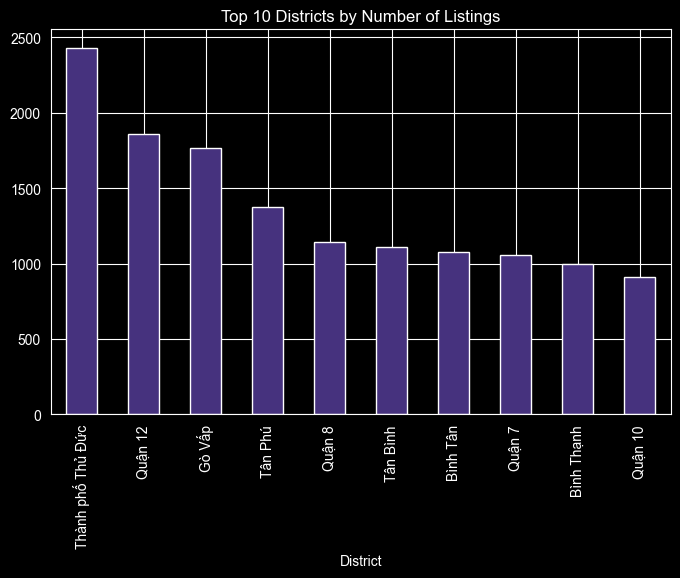

In [13]:
df["District"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Districts by Number of Listings")
plt.show()


MT và hẻm

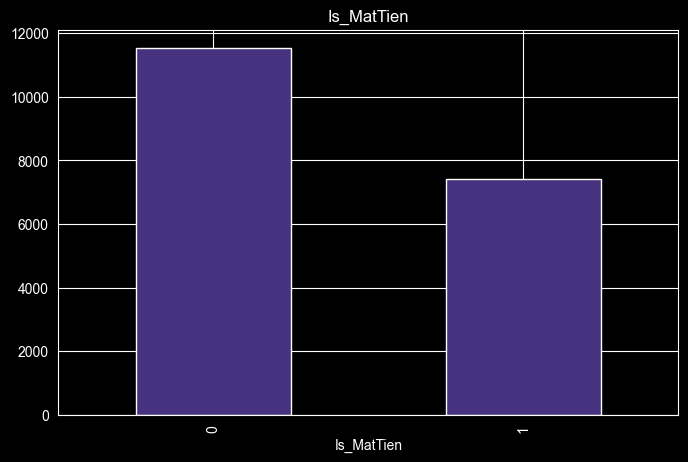

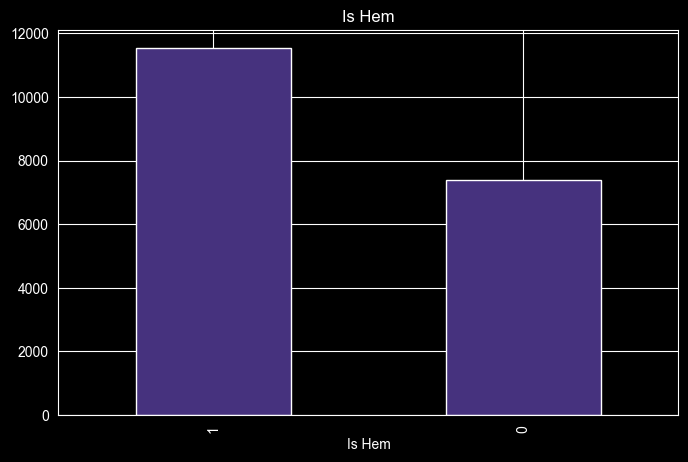

In [14]:
df["Is_MatTien"].value_counts().plot(kind="bar", title="Is_MatTien")
plt.show()

df["Is Hem"].value_counts().plot(kind="bar", title="Is Hem")
plt.show()


Nhận xét

    Dữ liệu phân bố không đồng đều giữa các quận.
    Nhà trong hẻm chiếm tỷ lệ lớn hơn nhà mặt tiền.
    Vị trí là yếu tố quan trọng trong dữ liệu.

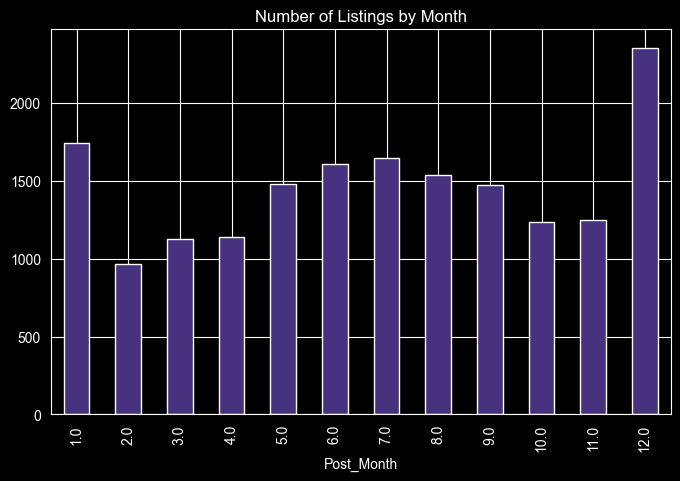

In [15]:
df["Post Time"] = pd.to_datetime(df["Post Time"], dayfirst=True, errors="coerce")

df["Post_Month"] = df["Post Time"].dt.month
df["Post_Year"] = df["Post Time"].dt.year
df["Post_Month"].value_counts().sort_index().plot(kind="bar")
plt.title("Number of Listings by Month")
plt.show()

Nhận xét

    Hoạt động đăng tin có sự khác biệt theo thời gian.
    Một số tháng có lượng tin đăng cao hơn.
    Thời gian đăng bài có thể dùng làm đặc trưng phụ.

Kết quả EDA tổng quan cho thấy tập dữ liệu có chất lượng tốt,
ít giá trị thiếu ở các biến quan trọng và phản ánh đúng đặc điểm
thị trường nhà đất TP.HCM. Dữ liệu tồn tại outliers hợp lý,
phân bố không đồng đều theo quận và loại hình nhà ở.
Bước EDA này tạo nền tảng cho việc phân tích chuyên sâu
theo bài toán phân loại giá nhà đất.

BOXPLOT GIÁ NHÀ THEO TỪNG QUẬN

<Figure size 1200x600 with 0 Axes>

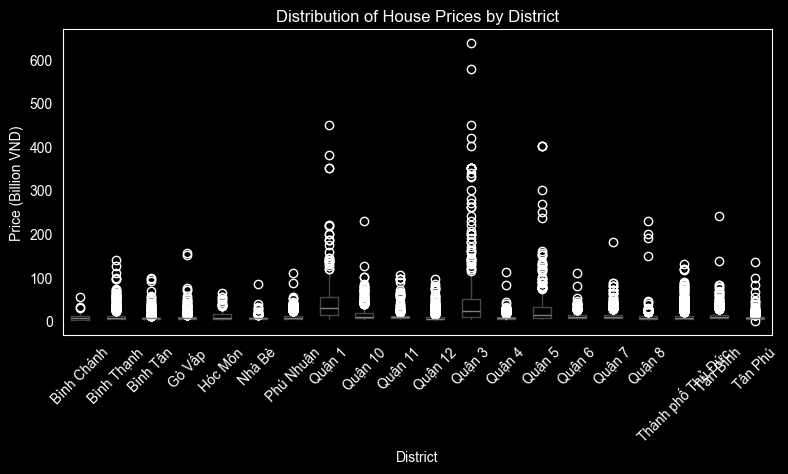

In [16]:
# Lọc các quận có đủ số lượng mẫu (tránh quận quá ít dữ liệu)
district_counts = df['District'].value_counts()
valid_districts = district_counts[district_counts >= 100].index

df_box = df[df['District'].isin(valid_districts)]

# Sort quận theo median giá cho đẹp
order = (
    df_box.groupby('District')['Price_Billion']
    .median()
    .sort_values()
    .index
)

plt.figure(figsize=(12, 6))
df_box.boxplot(
    column='Price_Billion',
    by='District',
    grid=False,
    rot=45,
    showfliers=True
)

plt.suptitle("")
plt.title("Distribution of House Prices by District")
plt.xlabel("District")
plt.ylabel("Price (Billion VND)")
plt.tight_layout()
plt.show()


Boxplot cho thấy sự khác biệt rõ rệt về phân bố giá nhà giữa các quận.
Các quận trung tâm có median giá cao hơn và độ phân tán lớn, cho thấy sự tồn tại của nhiều bất động sản cao cấp.
Một số quận ngoại thành có giá tập trung ở mức thấp hơn và ít outlier, phản ánh thị trường ổn định hơn.
Điều này cho thấy vị trí theo quận là yếu tố then chốt trong phân khúc giá nhà đất.

Giá nhà trung bình theo quận

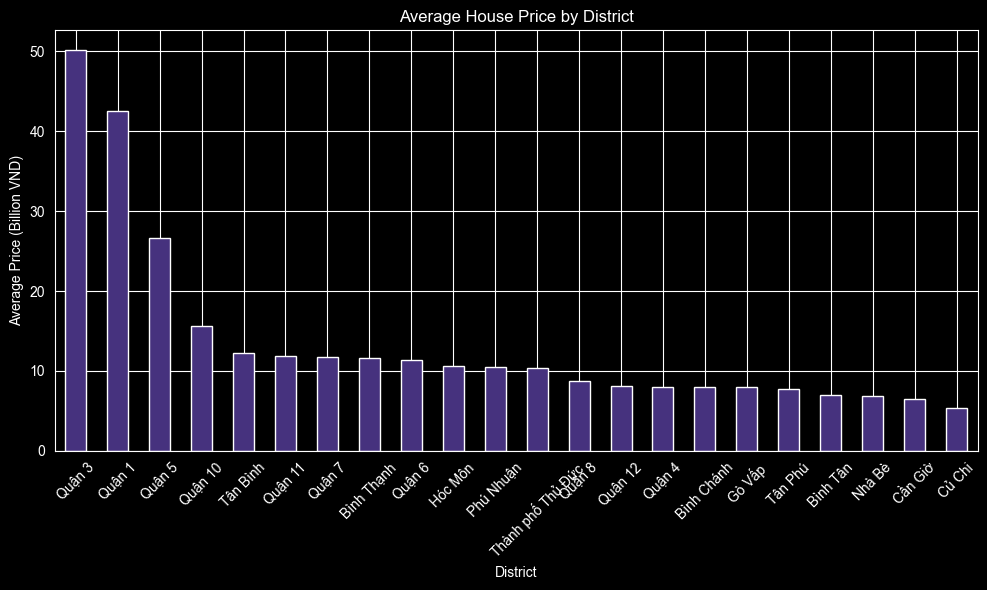

In [17]:
avg_price_district = (
    df.groupby('District')['Price_Billion']
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10, 6))
avg_price_district.plot(kind='bar')

plt.title("Average House Price by District")
plt.xlabel("District")
plt.ylabel("Average Price (Billion VND)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Giá nhà trung bình có sự chênh lệch đáng kể giữa các quận tại TP.HCM.
Các quận trung tâm có giá trung bình cao hơn rõ rệt so với các quận vùng ven.
Tuy nhiên, giá trung bình không phản ánh đầy đủ toàn bộ thị trường do chịu ảnh hưởng bởi các bất động sản giá rất cao.
Vì vậy, cần kết hợp cả giá trung bình và phân bố giá (boxplot) để hiểu rõ thị trường

PPT

--- SỐ LIỆU SLIDE 1 ---
Tổng số Quận/Huyện: 22
Top 3 Quận có lượng tin đăng lớn nhất:
- Thành phố Thủ Đức: 2430 tin
- Quận 12: 1860 tin
- Gò Vấp: 1763 tin


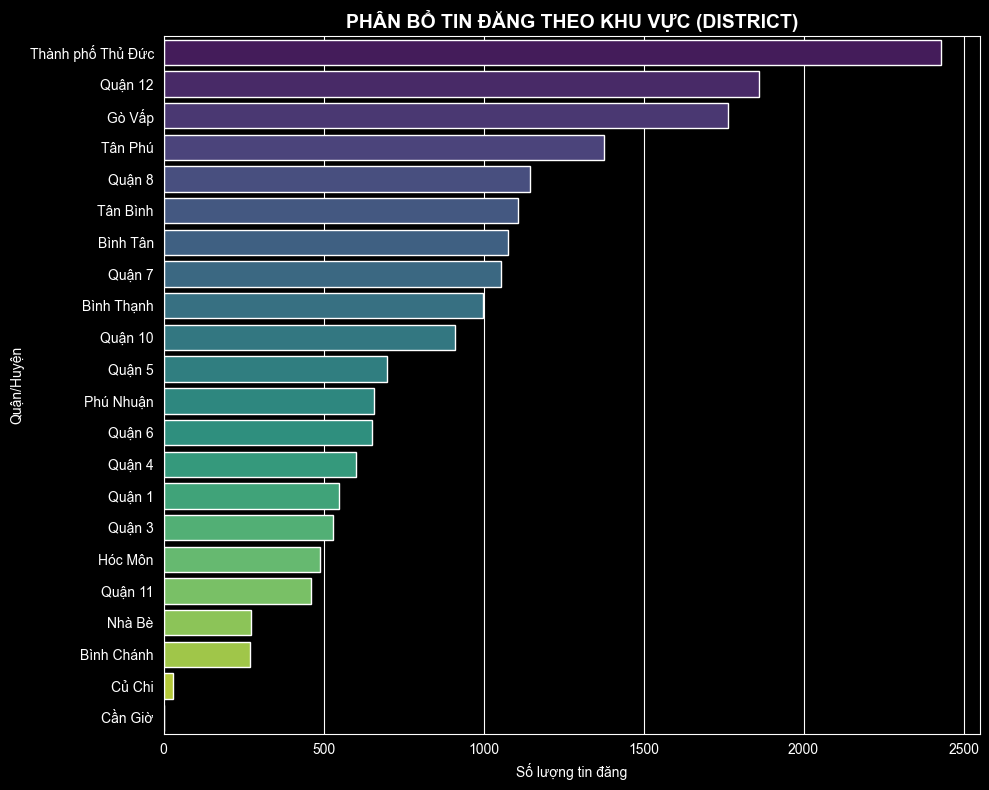


--- SỐ LIỆU SLIDE 2 ---
Nhà Hẻm: 11531 tin (60.9%)
Nhà Mặt Tiền: 7404 tin (39.1%)


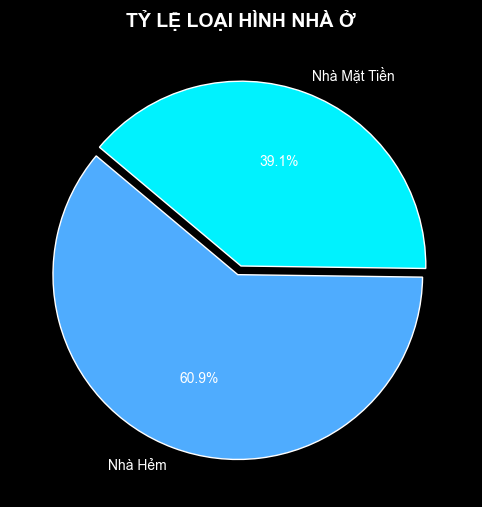


--- SỐ LIỆU SLIDE 3 ---
- Bình dân: 4264 tin (22.5%)
- Trung cấp: 10379 tin (54.8%)
- Cao cấp: 3207 tin (16.9%)
- VIP: 1085 tin (5.7%)


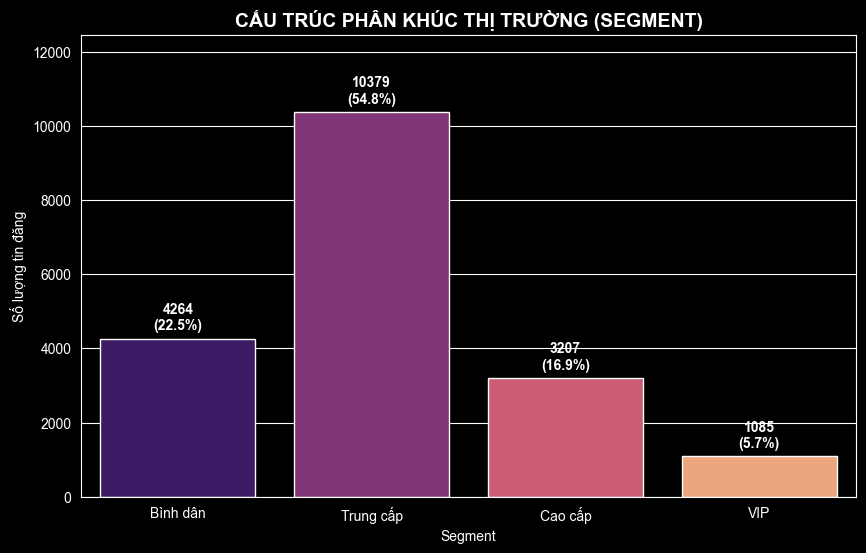

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Thiết lập font và style để vẽ biểu đồ đẹp
plt.style.use('seaborn-v0_8-muted')
sns.set_palette("viridis")

# 1. DỮ LIỆU SLIDE 1: PHÂN BỔ THEO QUẬN
dist_counts = df['District'].value_counts()
top_3_dist = dist_counts.head(3)

print("--- SỐ LIỆU SLIDE 1 ---")
print(f"Tổng số Quận/Huyện: {df['District'].nunique()}")
print("Top 3 Quận có lượng tin đăng lớn nhất:")
for dist, count in top_3_dist.items():
    print(f"- {dist}: {count} tin")

# Vẽ biểu đồ Slide 1
plt.figure(figsize=(10, 8))
sns.barplot(x=dist_counts.values, y=dist_counts.index, hue=dist_counts.index, palette='viridis', legend=False)
plt.title('PHÂN BỔ TIN ĐĂNG THEO KHU VỰC (DISTRICT)', fontsize=14, fontweight='bold')
plt.xlabel('Số lượng tin đăng')
plt.ylabel('Quận/Huyện')
plt.tight_layout()
plt.show()

# 2. DỮ LIỆU SLIDE 2: HẺM VS MẶT TIỀN
hem_counts = df['Is Hem'].value_counts()
labels = ['Nhà Hẻm', 'Nhà Mặt Tiền']
sizes = [hem_counts[1], hem_counts[0]] # 1 là Hẻm, 0 là Mặt Tiền

print("\n--- SỐ LIỆU SLIDE 2 ---")
print(f"Nhà Hẻm: {sizes[0]} tin ({sizes[0]/sum(sizes)*100:.1f}%)")
print(f"Nhà Mặt Tiền: {sizes[1]} tin ({sizes[1]/sum(sizes)*100:.1f}%)")

# Vẽ biểu đồ Slide 2
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#4facfe', '#00f2fe'], explode=(0.05, 0))
plt.title('TỶ LỆ LOẠI HÌNH NHÀ Ở', fontsize=14, fontweight='bold')
plt.show()

# 3. DỮ LIỆU SLIDE 3: PHÂN KHÚC (SEGMENT)
segment_order = ['Bình dân', 'Trung cấp', 'Cao cấp', 'VIP']
# Đảm bảo Segment là Categorical để sắp xếp đúng thứ tự khi in/vẽ
df['Segment'] = pd.Categorical(df['Segment'], categories=segment_order, ordered=True)
seg_counts = df['Segment'].value_counts().sort_index()

print("\n--- SỐ LIỆU SLIDE 3 ---")
for seg, count in seg_counts.items():
    print(f"- {seg}: {count} tin ({count/len(df)*100:.1f}%)")

# Vẽ biểu đồ Slide 3 (Dạng Stacked Bar hoặc Bar đứng)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=seg_counts.index, y=seg_counts.values, palette='magma', hue=seg_counts.index, legend=False)
plt.title('CẤU TRÚC PHÂN KHÚC THỊ TRƯỜNG (SEGMENT)', fontsize=14, fontweight='bold')
plt.ylabel('Số lượng tin đăng')
# Thêm số liệu % trên đầu cột
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}\n({p.get_height()/len(df)*100:.1f}%)',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 15),
                textcoords = 'offset points', fontweight='bold')
plt.ylim(0, max(seg_counts.values) * 1.2)
plt.show()

In [20]:
# 1. Tính giá trung bình mỗi m2 theo từng Quận
district_stats = df.groupby('District')['Price_Per_m2'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)

# 2. Lấy Top 1 và Bottom 1
top_1_dist = district_stats.index[0]
top_1_val = district_stats['mean'].iloc[0]

bottom_1_dist = district_stats.index[-1]
bottom_1_val = district_stats['mean'].iloc[-1]

print(f"--- THỐNG KÊ GIÁ THEO KHU VỰC ---")
print(f"⭐ Quận đắt đỏ nhất: {top_1_dist} ({top_1_val:.2f} triệu/m2)")
print(f"⚓ Quận giá 'mềm' nhất: {bottom_1_dist} ({bottom_1_val:.2f} triệu/m2)")
print(f"➡ Gấp nhau khoảng: {top_1_val/bottom_1_val:.1f} lần")

# 3. Xem danh sách đầy đủ để copy vào bảng PPT (nếu cần)
print("\n--- BẢNG XẾP HẠNG CHI TIẾT ---")
print(district_stats)

--- THỐNG KÊ GIÁ THEO KHU VỰC ---
⭐ Quận đắt đỏ nhất: Quận 1 (371.75 triệu/m2)
⚓ Quận giá 'mềm' nhất: Cần Giờ (10.16 triệu/m2)
➡ Gấp nhau khoảng: 36.6 lần

--- BẢNG XẾP HẠNG CHI TIẾT ---
                         mean  count
District                            
Quận 1             371.750931    548
Quận 3             307.175141    531
Quận 5             250.132267    697
Quận 10            206.185571    910
Phú Nhuận          167.250895    659
Quận 11            159.068677    461
Tân Bình           145.573255   1109
Quận 6             139.616221    651
Bình Thạnh         135.506366    999
Quận 4             132.475383    600
Quận 7             128.092296   1054
Quận 8             120.324119   1146
Gò Vấp             114.829189   1763
Tân Phú            101.291161   1378
Thành phố Thủ Đức   90.338498   2430
Bình Tân            86.654401   1077
Nhà Bè              82.970000    274
Quận 12             74.413790   1860
Bình Chánh          66.539444    270
Hóc Môn             49.630779    488